# Classificação de tweets no contexto político

### Regressão Logística

#### Brunna de Sousa Pereira Amorim


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

C:\Users\Brunna\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("tweetsGeral.csv")
data.head()

,Unnamed: 0,text,favoriteCount,retweetCount,politico
0,1,Retweeted D�cio Lima (@deciolimapt): �Nunca f...,0,0,1
1,2,"Vers�o estendida. Aqui, Marcia Tiburi justif...",0,86,1
2,3,BOMBA!!! S�tio caiu! Delator confirma s�tio A...,0,52,1
3,4,processo contra Romero Juc� ficou QUATORZE an...,0,54,1
4,5,Ser� petismo decidiu criticar benef�cios injus...,0,0,1


In [3]:
data.tail()

,Unnamed: 0,text,favoriteCount,retweetCount,politico
13647,13787,"To louca trabalhar, mudar essa rotina gente i...",0,17,0
13648,13788,Saudades tempos n�o voltam mais,0,530,0
13649,13789,@S_Pekiinhaa Uhum,0,1,0
13650,13790,�ltima atualiza��o visitantes meu perfil,0,0,0
13651,13791,Gente usa camisinha carnaval vcs s�o mto feio...,0,41,0


In [4]:
data[['favoriteCount', 'retweetCount', 'politico']].groupby('politico').mean()

,favoriteCount,retweetCount
politico,,
0,0.051176,748.910147
1,22.265032,33.574723


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C927CC0>]], dtype=object)

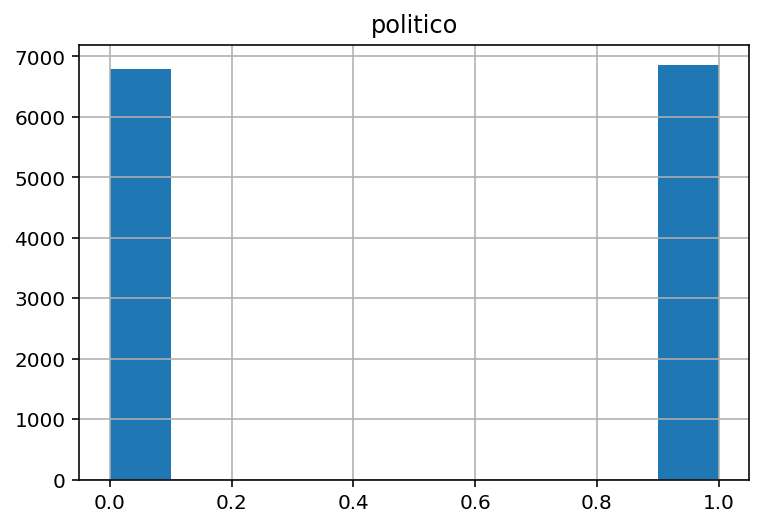

In [5]:
pd.DataFrame(data.politico).hist()

## 3 - Dados com features não-textuais

Para essa seção, usaremos a base de dados que possuem as informações não-textuais dos tweets.

### 3.1 - Preparando os Dados

Para a classificação dos tweets, foi gerada uma nova *bag of words* TFIDF incluindo as características não-textuais.

In [6]:
bowComFeature = pd.read_csv("bow_tweets_carac.csv")

In [7]:
Y_feature = bowComFeature[bowComFeature.columns[0]]
Y_feature = np.ravel(Y_feature)

In [8]:
bowComFeature.drop(bowComFeature.columns[[0]], axis=1, inplace=True)

In [9]:
dataX_feature = bowComFeature
dataY_feature = bowComFeature[bowComFeature.shape[0]:]

### 3.2 - Regressão Logística

In [10]:
modelFeature = LogisticRegression()
modelFeature = modelFeature.fit(dataX_feature, Y_feature)

# check the accuracy on the training set
modelFeature.score(dataX_feature, Y_feature)

0.97859046984338549

In [11]:
pd.DataFrame(zip(dataX_feature.columns, np.transpose(modelFeature.coef_)))

,0,1
0,1.671309552851148,[-2.20607862132]
1,0.0,[-0.145908538696]
2,0.0.1,[-0.0326021750188]
3,0.0.2,[4.22647378056e-07]
4,0.0.3,[-0.0426859795352]
5,0.0.4,[-0.0297147780963]
6,0.0.5,[3.10358947109e-06]
7,0.0.6,[-0.0299919900939]
8,0.0.7,[-0.0393682777446]
9,0.0.8,[0.691951314798]


#### 4.2.1 - Validação Cruzada

In [12]:
valores = [0.001, 0.005, 0.01, 0.05, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

def score_acuracia(model, X, Y):
    scores_acuracia= cross_val_score(model, X, Y, scoring="accuracy", cv = 10)
    return(scores_acuracia)

In [13]:
cv_acuracia_feature = [score_acuracia(LogisticRegression(C = valor), dataX_feature, Y_feature).mean() 
            for valor in valores]

In [14]:
cv_acuracia_feature = pd.Series(cv_acuracia_feature, index = valores)


In [15]:
lr_feature = LogisticRegression(C=0.05)
modelo_feature = lr_feature.fit(dataX_feature, Y_feature)
print modelo_feature.coef_
acuracia_cv_feature = modelo_feature.score(dataX_feature, Y_feature)
print acuracia_cv_feature

[[ -9.84749150e-01  -4.02071562e-02  -6.91369015e-03 ...,   1.10822821e-02
    1.07326351e+00  -7.08863151e-04]]
0.917777407531


#### 4.2.2 - Usando um Validation Set

In [16]:
X_treino_feature, X_teste_feature, y_treino_feature, y_teste_feature = train_test_split(dataX_feature, Y_feature, test_size=0.3)
modeloTreinoTesteFeature = LogisticRegression(C=0.05)
modeloTreinoTesteFeature.fit(X_treino_feature, y_treino_feature)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
predicao_feature = modeloTreinoTesteFeature.predict(X_teste_feature)
print predicao_feature

[1 0 1 ..., 0 0 0]


In [18]:
acuracia_vs_feature = metrics.accuracy_score(y_teste_feature, predicao_feature)
print acuracia_vs_feature

0.884786229872


In [19]:
print metrics.confusion_matrix(y_teste_feature, predicao_feature)
print metrics.classification_report(y_teste_feature, predicao_feature)

[[1723   40]
 [ 375 1464]]
             precision    recall  f1-score   support

          0       0.82      0.98      0.89      1763
          1       0.97      0.80      0.88      1839

avg / total       0.90      0.88      0.88      3602



## Resultados

Podemos perceber que o uso da Regressão Logística para classificação de tweets políticos é viável devido à alta taxa de acertos do classificador.

In [20]:
print "---------------------------------------------"

print "Dados com features:"
print("Cross Validation - Acurácia: {0}").format(acuracia_cv_feature)
print("Validation Set - Acurácia: {0}").format(acuracia_vs_feature)
print "---------------------------------------------"

---------------------------------------------
Dados com features:
Cross Validation - Acurácia: 0.917777407531
Validation Set - Acurácia: 0.884786229872
---------------------------------------------
